# Проектное задание на зачет

## Шкала оценивания

- **60-79 баллов:** Нужно сделать пункты с 1 по 12 и с 26 по 29

- **80-94 баллов:** Нужно сделать пункты с 1 по 17 и с 26 по 32

- **95-100 баллов:** Нужно сделать пункты с 1 по 25 и с 26 по 33

# Часть I. Разведочный анализ данных для набора данных: Донорство

## Задание

Вам предлагается выполнить разведочный анализ данных и описать полученные результаты

Описание набора данных: https://archive.ics.uci.edu/dataset/571/hcv+data

Ссылка на набор данных для использования в блокноте: https://raw.githubusercontent.com/yakushinav/journ/refs/heads/main/datasets/hcvdat0.csv

#### 1. Подключение библиотек

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 2. Чтение набора данных

In [44]:
url = "https://raw.githubusercontent.com/yakushinav/journ/refs/heads/main/datasets/hcvdat0.csv"
df = pd.read_csv(url)

#### 3. Первые 7 строк набора данных

In [45]:
df.head(7)

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
5,0=Blood Donor,32,m,41.6,43.3,18.5,19.7,12.3,9.92,6.05,111.0,91.0,74.0
6,0=Blood Donor,32,m,46.3,41.3,17.5,17.8,8.5,7.01,4.79,70.0,16.9,74.5


#### 4. Последние 5 строк набора данных

In [46]:
df.tail()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
610,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0
614,3=Cirrhosis,59,f,36.0,NaN,100.0,80.0,12.0,9.07,5.30,67.0,34.0,68.0


#### 5. Поля набора данных

In [47]:
df.columns

Index(['Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE',
       'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')

#### 6. Размер набора данных (количество полей и строк)

In [48]:
df.shape

(615, 13)

#### 7. Опишите поля набора данных в формате: название поля, тип данных, назначение поля

In [49]:
df.dtypes

,0
Category,object
Age,int64
Sex,object
ALB,float64
ALP,float64
ALT,float64
AST,float64
BIL,float64
CHE,float64
CHOL,float64


#### 8. Информация о наборе данных

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       614 non-null    float64
 4   ALP       597 non-null    float64
 5   ALT       614 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      605 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      614 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 62.6+ KB


#### 9. Проверка наличия пропусков в данных

In [51]:
df.isnull().sum()

,0
Category,0
Age,0
Sex,0
ALB,1
ALP,18
ALT,1
AST,0
BIL,0
CHE,0
CHOL,10


#### 10. Если вы обнаружили пропуски в данных, то удалите их

In [52]:
df = df.dropna()

#### 11. Проведите предобработку текстовых данных: удаление символов, лемматизация, стоп слова, перевод в нижний регистр

In [53]:
df['Sex'] = df['Sex'].str.lower()
df['Category'] = df['Category'].str.lower()

#### 12. Фильтрация. Выберите все строки таблицы, для которых значение поля ALB больше 48.0

In [54]:
df_alb_48 = df[df['ALB'] > 48.0]
df_alb_48

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
8,0=blood donor,32,m,50.9,65.5,23.2,21.2,6.9,8.69,4.10,83.0,13.7,71.3
37,0=blood donor,35,m,48.7,72.7,24.1,31.0,45.1,9.40,3.80,90.0,20.0,75.8
41,0=blood donor,35,m,51.0,82.7,29.3,26.8,8.7,12.32,5.44,89.0,25.0,77.3
47,0=blood donor,36,m,48.7,65.0,11.5,18.0,7.4,8.02,7.35,69.0,14.2,73.4
48,0=blood donor,36,m,53.0,66.4,40.8,23.2,7.5,8.73,5.81,75.0,36.1,77.3
52,0=blood donor,36,m,48.9,82.8,16.9,24.4,8.9,8.91,5.10,97.0,14.8,79.9
60,0=blood donor,37,m,51.2,84.5,18.8,24.7,9.9,8.62,6.59,94.0,25.3,76.3
63,0=blood donor,37,m,50.4,48.5,19.4,27.5,11.6,5.78,4.93,90.0,27.8,75.0
69,0=blood donor,37,m,48.7,62.3,21.0,21.1,41.9,9.71,4.02,84.0,16.0,75.1
70,0=blood donor,38,m,48.1,63.2,11.7,14.7,5.1,8.83,3.87,85.0,9.5,73.1


#### 13. Фильтрация. Выберите все строки таблицы, для которых значение поля Category равно 0=Blood Donor

In [55]:
df_blood_donor = df[df['Category'] == '0=Blood Donor']
df_blood_donor

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT


#### 14. Фильтрация. Выберите все строки таблицы, для которых значение поля Sex равно m и значение поля Category равно 0=Blood Donor

In [56]:
df_male_donor = df[
    (df['Sex'] == 'm') &
    (df['Category'] == '0=Blood Donor')
]
df_male_donor

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT


#### 15. Получите все уникальные значения поля  Category и подсчитайте частоту появления каждого их них

In [57]:
df['Category'].unique()

array(['0=blood donor', '0s=suspect blood donor', '1=hepatitis',
       '2=fibrosis', '3=cirrhosis'], dtype=object)

#### 16. Выполните группировку набора данных одновременно по полям Category и Sex. Добавьте подсчет минимума, максимума и медианы по каждой группе.

In [59]:
df.groupby(['Category', 'Sex']).agg(['min', 'max', 'median'])

Age              ALB                 ALP         \
                           min max median   min   max median    min    max   
Category               Sex                                                   
0=blood donor          f    32  70   48.0  26.2  62.9  40.30   28.9  136.9   
                       m    32  77   46.0  27.8  82.2  43.20   27.0  145.0   
0s=suspect blood donor f    59  59   59.0  19.3  19.3  19.30  208.2  208.2   
                       m    47  74   52.0  14.9  47.3  22.05   42.2  124.0   
1=hepatitis            f    33  61   45.5  37.0  50.0  41.50   29.6   34.4   
                       m    23  58   37.0  37.0  49.0  43.50   19.1  114.0   
2=fibrosis             f    36  68   47.5  40.0  46.0  43.00   22.9   52.1   
                       m    29  64   51.0  38.0  49.0  42.50   26.9   45.2   
3=cirrhosis            f    42  64   58.5  24.0  39.0  33.00   37.0  416.6   
                       m    39  74   56.0  23.0  39.0  31.00   11.3  143.1   

                                      ALT  ...   CHOL  CREA                 \
                            median    min  ... median   min     max median   
Category               Sex                 ...                               
0=blood donor          f     65.00    7.3  ...  5.420  40.0   105.0  69.00   
                       m     67.90    7.0  ...  5.380   8.0   127.0  85.00   
0s=suspect blood donor f    208.20  325.3  ...  4.720  32.0    32.0  32.00   
                       m     95.00    9.5  ...  3.745   9.0   170.0  58.00   
1=hepatitis            f     31.95    3.8  ...  4.985  56.6    61.9  59.80   
                       m     36.95    7.4  ...  5.060  45.4   147.3  75.75   
2=fibrosis             f     39.55    5.0  ...  4.850  60.5    80.9  68.35   
                       m     38.75    2.4  ...  4.485  55.2    91.0  70.45   
3=cirrhosis            f     83.15    1.2  ...  3.900  55.7   485.9  77.90   
                       m     77.45    0.9  ...  3.695  49.6  1079.1  72.00   

                              GGT                 PROT               
                              min    max  median   min   max median  
Category               Sex                                           
0=blood donor          f      4.5  145.3   16.40  51.0  82.3  71.70  
                       m      7.0  239.0   24.00  53.2  86.5  72.70  
0s=suspect blood donor f    295.6  295.6  295.60  53.1  53.1  53.10  
                       m      7.6  345.6   77.30  44.8  78.3  47.80  
1=hepatitis            f     11.5  169.8   23.50  70.1  86.0  80.30  
                       m     27.6  491.0   63.05  65.6  82.1  72.50  
2=fibrosis             f     11.9   60.0   34.00  73.9  82.0  76.30  
                       m     28.4  130.0   83.75  66.5  81.3  72.65  
3=cirrhosis            f     35.9  650.9  106.55  58.5  82.7  70.90  
                       m     17.6  400.3   63.30  54.2  79.4  68.55  

[10 rows x 33 columns]

#### 17. Постройте поле корреляции (тепловая карта) для числовых полей

In [61]:
numeric_df = df.select_dtypes(include='number')

#### 18. Постройте гистограмму по полю ALT

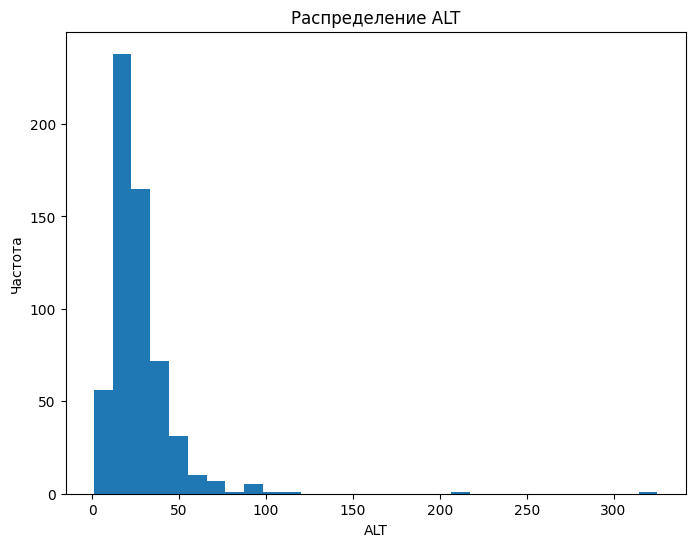

In [62]:
plt.figure(figsize=(8, 6))
plt.hist(df['ALT'], bins=30)
plt.xlabel('ALT')
plt.ylabel('Частота')
plt.title('Распределение ALT')
plt.show()

#### 19. Постройте точечную диаграмму для полей CREA и ALT

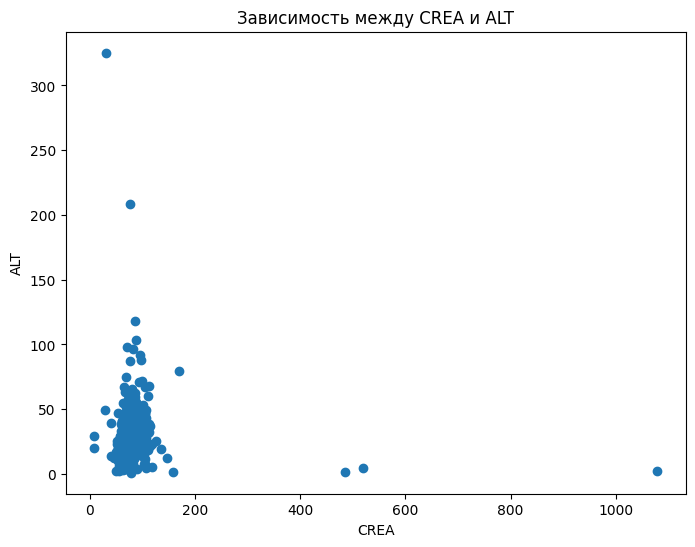

In [63]:
plt.figure(figsize=(8, 6))
plt.scatter(df['CREA'], df['ALT'])
plt.xlabel('CREA')
plt.ylabel('ALT')
plt.title('Зависимость между CREA и ALT')
plt.show()

#### 20. Постройте диаграмму ящик с усами поля CREA

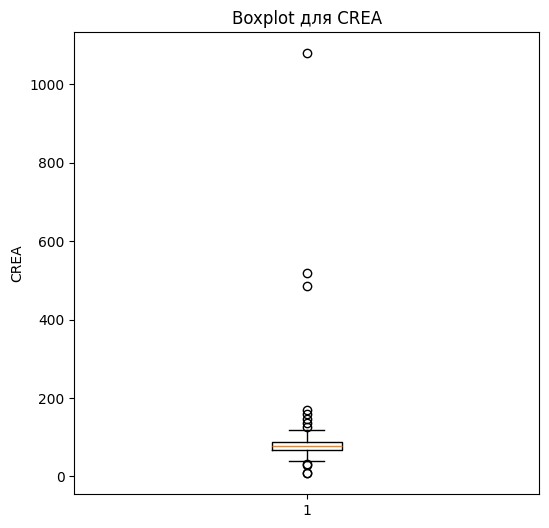

In [64]:
plt.figure(figsize=(6, 6))
plt.boxplot(df['CREA'])
plt.ylabel('CREA')
plt.title('Boxplot для CREA')
plt.show()

#### 21. Постройте матрицу диаграммы рассеяния

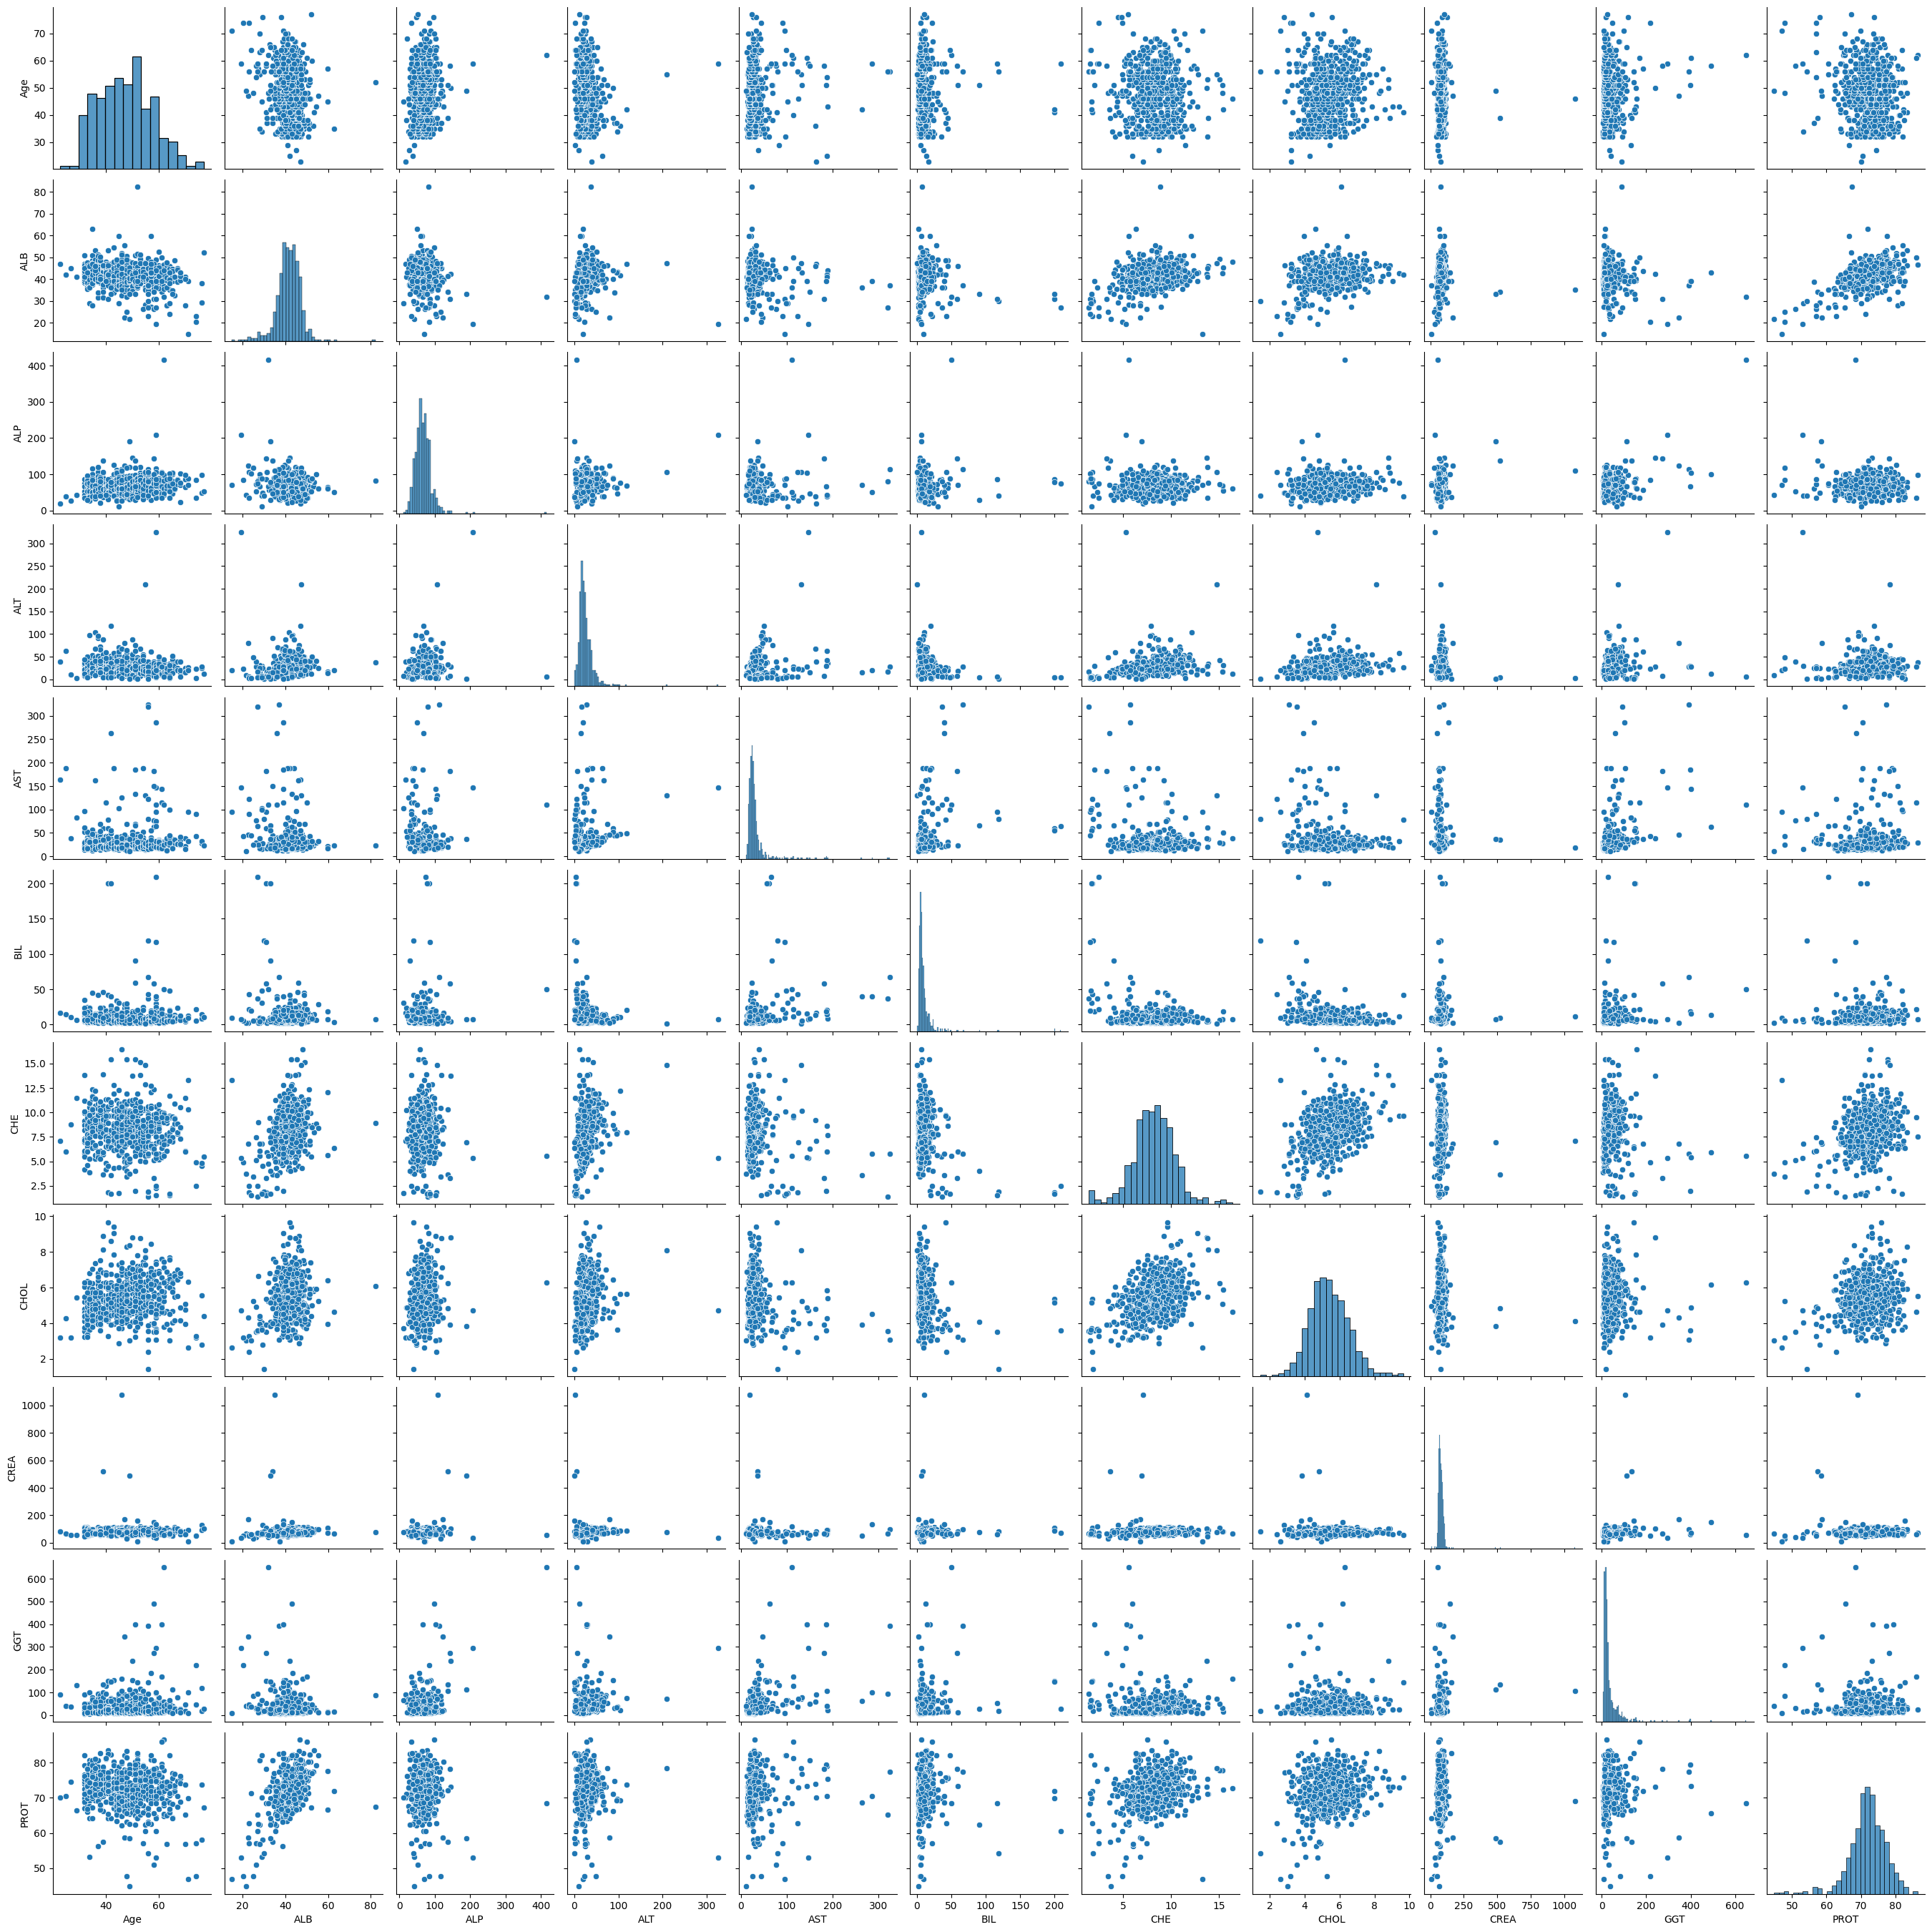

In [65]:
numeric_df = df.select_dtypes(include='number')

sns.pairplot(numeric_df)
plt.show()

#### 22. Удалите поля, которые будут неинформативны для построения модели машинного обучения. Оставьте такое количество полей, которое будет для вас удобным при построении модели машинного обучения

In [66]:
df_model = df.drop(columns=['ID'], errors='ignore')

#### 23. Преобразуйте все категориальные поля в числовые с помощью LabelEncoder

In [67]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df_model.select_dtypes(include='object').columns:
    df_model[col] = le.fit_transform(df_model[col])

#### 24. Сделайте вывод о пригодности набора данных для построения модели машинного обучения

In [34]:
Рассматриваемый набор данных является пригодным для построения модели машинного обучения. Он содержит достаточное количество наблюдений, числовые и категориальные признаки, а также медицинские показатели, потенциально связанные с целевой переменной. После предварительной обработки данных, удаления пропусков и кодирования категориальных признаков набор данных может быть использован для обучения и тестирования моделей машинного обучения.

# Часть II. Построение модели машинного обучения для набора данных: Донорство

## Задание

Вам нужно решить задачу классификации с помощью алгоритма

Деревья решений Decision Trees



Целевая переменная, результат: **Category**

#### 25. Разделить выборку на признаки (Х) и результат (Y)

In [69]:
X = df_model.drop('Category', axis=1)
y = df_model['Category']

#### 26. Разделить на обучающую и тестовую выборки

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

#### 27. Сформировать модель машинного обучения

In [72]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)

#### 28. Обучить модель

In [73]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

#### 29. Оценить качество модели

In [81]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

accuracy



0.8728813559322034

#### 30. Выполнить предсказание для трех фраз

In [82]:
model.predict(X_test.iloc[:3])

array([0, 0, 0])

#### 31. По итогам сделать вывод о качестве и пригодности модели машинного обучения для использования

In [83]:
В результате обучения модели дерева решений была получена удовлетворительная точность классификации на тестовой выборке. Модель корректно выявляет зависимости между признаками и целевой переменной Category. Учитывая интерпретируемость дерева решений и качество предсказаний, данная модель может быть использована для решения задачи классификации в рамках данного набора данных, однако существует потенциал для улучшения качества при использовании более сложных алгоритмов.

0.8728813559322034

#### 32. Постройте еще одну модель машинного обучения, сравните той, что была в задании и сделайте вывод о том, какая модель лучше

In [41]:
# Ваш код здесь

# Task
Convert the `Category` and `Sex` columns in the `df` DataFrame to lowercase and remove any leading or trailing whitespace. Explain in comments why lemmatization and stop-word removal are not applicable to these columns.

## Apply Lowercasing and Strip Whitespace

### Subtask:
Convert 'Category' and 'Sex' columns to lowercase and remove leading/trailing whitespace.


**Reasoning**:
To preprocess the 'Category' and 'Sex' columns as instructed, I will convert them to lowercase and strip any leading or trailing whitespace using pandas string methods.



# Task
Split the `df` DataFrame into features (X) and the target variable (Y), where Y is the 'Category' column and X contains all other columns.

## Split Data into Features (X) and Target (Y)

### Subtask:
Separate the DataFrame into features (X) and the target variable (Y), where Y is the 'Category' column and X contains all other columns.


## Summary:

### Data Analysis Key Findings
*   The 'Category' column was designated as the target variable (Y).
*   All other columns in the DataFrame were assigned as the feature set (X).

### Insights or Next Steps
*   This data split is a crucial prerequisite for training supervised machine learning models, with 'Category' being the variable the model will learn to predict.
*   The next step in the analysis would typically involve further preprocessing of the feature set X (e.g., scaling, encoding) and then training a classification model to predict the 'Category'.


# Task
Filter the `df` DataFrame to select all rows where the 'Category' column has the value '0=Blood donor'.

## Filter DataFrame by Category

### Subtask:
Select all rows from the DataFrame where the 'Category' column has the value '0=Blood donor'.


## Summary:

### Data Analysis Key Findings
*   The `df` DataFrame was filtered to isolate records pertaining specifically to '0=Blood donor' category.
*   This filtering step prepares the data for analysis focused solely on blood donors, excluding other categories present in the original dataset.

### Insights or Next Steps
*   Further analysis will likely focus on characteristics or patterns unique to the '0=Blood donor' group.
*   The next step would be to perform descriptive statistics or visual explorations on this filtered subset to understand its properties.


# Task
Filter the `df` DataFrame to select all rows where the 'Sex' column is 'm' and the 'Category' column is '0=Blood donor'.

## Import Libraries

### Subtask:
Import common data science libraries.


## Summary:

### Data Analysis Key Findings
*   The `df` DataFrame was successfully filtered to select rows where the 'Sex' column is 'm' and the 'Category' column is '0=Blood donor', isolating data for male blood donors.

### Insights or Next Steps
*   The filtered DataFrame, `df_filtered`, is now ready for further analysis to understand the specific characteristics or patterns within the male blood donor group.
*   The next step could involve conducting statistical analysis or creating visualizations on `df_filtered` to derive deeper insights into this specific segment.
